# **3.1 Text Preprocessing, Tokenization, and Sequence Padding:**

In [ ]:
!pip uninstall jax jaxlib

Found existing installation: jax 0.5.2
Uninstalling jax-0.5.2:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jax-0.5.2.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jax/*
Proceed (Y/n)? y
  Successfully uninstalled jax-0.5.2
Found existing installation: jaxlib 0.5.1
Uninstalling jaxlib-0.5.1:
  Would remove:
    /usr/local/lib/python3.11/dist-packages/jaxlib-0.5.1.dist-info/*
    /usr/local/lib/python3.11/dist-packages/jaxlib/*
Proceed (Y/n)? y
  Successfully uninstalled jaxlib-0.5.1


In [ ]:

!pip install numpy==1.23.5 # Installing a specific version of NumPy (1.23.5)

!pip install gensim # Gensim is used for natural language processing tasks, especially for working with Word2Vec and other word embeddings.

!pip install jax==0.4.13 # JAX is a high-performance library for numerical computing and machine learning.

!pip install jaxlib==0.4.13# JAXLIB works together with JAX, providing hardware acceleration (like GPU/TPU support).


  Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (8.1 kB)
  Using cached scipy-1.13.1-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl.metadata (60 kB)
Using cached gensim-4.3.3-cp311-cp311-manylinux_2_17_x86_64.manylinux2014_x86_64.whl (26.7 MB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 38.6/38.6 MB 14.4 MB/s eta 0:00:00
  Attempting uninstall: scipy
    Found existing installation: scipy 1.15.3
    Uninstalling scipy-1.15.3:
      Successfully uninstalled scipy-1.15.3
ERROR: pip's dependency resolver does not currently take into account all the packages that are installed. This behaviour is the source of the following dependency conflicts.
scikit-image 0.25.2 requires numpy>=1.24, but you have numpy 1.23.5 which is incompatible.
pymc 5.22.0 requires numpy>=1.25.0, but you have numpy 1.23.5 which is incompatible.
albumentations 2.0.6 requires numpy>=1.24.4, but you have numpy 1.23.5 which is incompatible.
imbalanced-learn 0.13

## **3.3.1 Loading Dataset**

In [ ]:
import keras
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
#from sklearn.preprocessing import is_sarcasticEncoder
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Embedding, SimpleRNN, LSTM, Dense, Dropout
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem import WordNetLemmatizer
nltk.download('stopwords')
nltk.download('wordnet')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.
[nltk_data] Downloading package wordnet to /root/nltk_data...


True

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
train_dataset_path = '/content/drive/MyDrive/2025 - 6CS012 - AI and ML - Student/Collection of Dataset for Text Classification/8. Sarcastic or Not Sarcastic Dataset/sarcastic_headlines.csv'
test_dataset_path = '/content/drive/MyDrive/AI and ML/Assessment/Assessment_2/test_sarcastic_headlines.csv'

In [ ]:
df = pd.read_csv(train_dataset_path)
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


In [ ]:
df[df['is_sarcastic'] == 1]['headline']

,headline
0,thirtysomething scientists unveil doomsday clo...
3,inclement weather prevents liar from getting t...
4,mother comes pretty close to using word 'strea...
7,richard branson's global-warming donation near...
8,shadow government getting too large to meet in...
...,...
28612,polish rapper under fire for use of the word '...
28614,jews to celebrate rosh hashasha or something
28615,internal affairs investigator disappointed con...
28617,mars probe destroyed by orbiting spielberg-gat...


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28619 entries, 0 to 28618
Data columns (total 2 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   headline      28619 non-null  object
 1   is_sarcastic  28619 non-null  int64 
dtypes: int64(1), object(1)
memory usage: 447.3+ KB


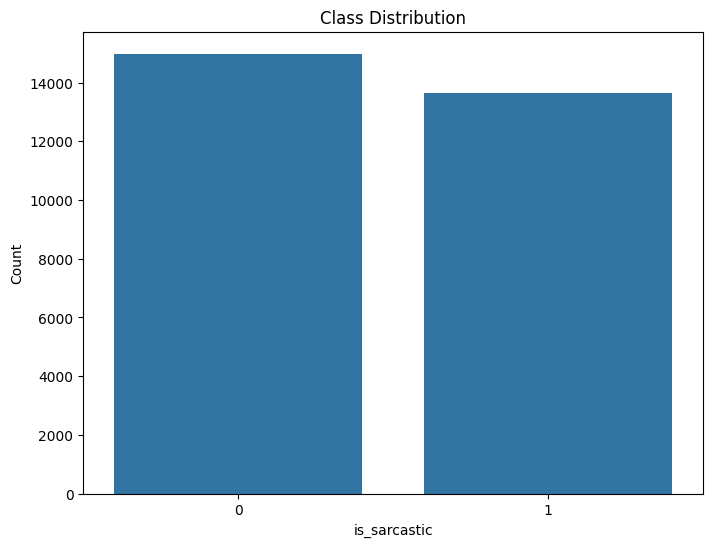

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

plt.figure(figsize=(8, 6))
sns.countplot(data=df, x='is_sarcastic')
plt.title("Class Distribution")
plt.xlabel("is_sarcastic")
plt.ylabel("Count")
plt.show()

In [ ]:
df.head()

,headline,is_sarcastic
0,thirtysomething scientists unveil doomsday clo...,1
1,dem rep. totally nails why congress is falling...,0
2,eat your veggies: 9 deliciously different recipes,0
3,inclement weather prevents liar from getting t...,1
4,mother comes pretty close to using word 'strea...,1


## **3.1.2 Data Cleaning and Normalization**

In [ ]:
import re  # For working with regular expressions (used for finding and replacing patterns in text)
import nltk  # Natural Language Toolkit – a library for text processing
from nltk.corpus import stopwords  # List of common words like "the", "and", etc., that we want to remove
from nltk.stem import WordNetLemmatizer  # For reducing words to their base form (e.g., "running" → "run")


nltk.download('stopwords')  # Downloads the list of stopwords
nltk.download('wordnet')  # Downloads the WordNet dictionary used for lemmatization
nltk.download('omw-1.4')  # WordNet's Open Multilingual Wordnet – needed for proper lemmatization


slang_dict = {
    "gr8": "great",
    "b4": "before",
    "u": "you",
    "ur": "your",
    "r": "are",
    "lol": "laugh",
    "omg": "oh my god",
    "idk": "i do not know",
    "btw": "by the way"
}

def preprocess_text(text):
    contractions = {
        "won't": "will not", "can't": "can not",
        "n't": " not", "'re": " are", "'s": " is",
        "'d": " would", "'ll": " will", "'t": " not",
        "'ve": " have", "'m": " am"
    }

    for pattern, repl in contractions.items():
        text = re.sub(pattern, repl, text)

    text = re.sub(r'\buser\w*\b', '', text, flags=re.IGNORECASE)

    text = text.lower()

    for slang, full in slang_dict.items():
        text = re.sub(r'\b' + re.escape(slang) + r'\b', full, text)

    text = re.sub(r'http\S+|www\S+', '', text)
    text = re.sub(r'[@#]', '', text)

    emoji_pattern = re.compile("["
        u"\U0001F600-\U0001F64F"
        u"\U0001F300-\U0001F5FF"
        u"\U0001F680-\U0001F6FF"
        u"\U0001F1E0-\U0001F1FF"
        u"\U00002702-\U000027B0"
        u"\U000024C2-\U0001F251"
        "]+", flags=re.UNICODE)
    text = emoji_pattern.sub(' ', text)

    text = re.sub(r'[^\w\s]', '', text)

    text = re.sub(r'[^a-zA-Z\s]', '', text)

    stop_words = set(stopwords.words('english'))
    lemmatizer = WordNetLemmatizer()
    tokens = text.split()
    tokens = [lemmatizer.lemmatize(word) for word in tokens if word not in stop_words]

    return ' '.join(tokens)


[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Package stopwords is already up-to-date!
[nltk_data] Downloading package wordnet to /root/nltk_data...
[nltk_data]   Package wordnet is already up-to-date!
[nltk_data] Downloading package omw-1.4 to /root/nltk_data...


In [ ]:
df['cleaned_headline'] = df['headline'].apply(preprocess_text)

In [ ]:
df

,headline,is_sarcastic,cleaned_headline
0,thirtysomething scientists unveil doomsday clo...,1,thirtysomething scientist unveil doomsday cloc...
1,dem rep. totally nails why congress is falling...,0,dem rep totally nail congress falling short ge...
2,eat your veggies: 9 deliciously different recipes,0,eat veggie deliciously different recipe
3,inclement weather prevents liar from getting t...,1,inclement weather prevents liar getting work
4,mother comes pretty close to using word 'strea...,1,mother come pretty close using word istreaming...
...,...,...,...
28614,jews to celebrate rosh hashasha or something,1,jew celebrate rosh hashasha something
28615,internal affairs investigator disappointed con...,1,internal affair investigator disappointed cons...
28616,the most beautiful acceptance speech this week...,0,beautiful acceptance speech week came queer ko...
28617,mars probe destroyed by orbiting spielberg-gat...,1,mar probe destroyed orbiting spielberggates sp...


## **3.1.3 Visualize the cleaned data**

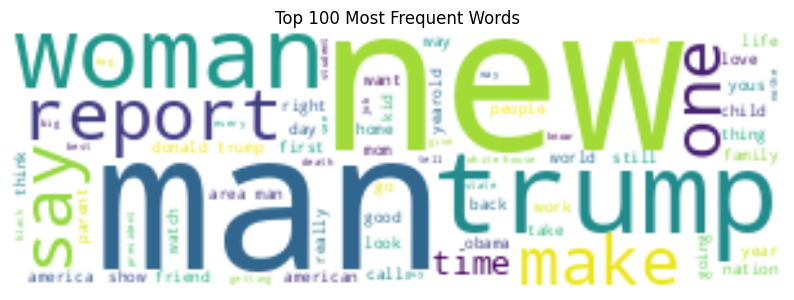

In [ ]:
from wordcloud import WordCloud # This helps us generate a visual image of the most frequent words

import matplotlib.pyplot as plt# Importing matplotlib to help us display the image


# Joining all the cleaned headlines into a single string separated by spaces


all_words = ' '.join(df['cleaned_headline'])

wordcloud = WordCloud(
    width=300,
    height=100,
    background_color='white',
    max_words=100
).generate(all_words)

plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('Top 100 Most Frequent Words')
plt.show()

## **3.1.4 Train Test Split**

In [ ]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(
    df['cleaned_headline'],
    df['is_sarcastic'],
    test_size=0.2,
    random_state=42
)

## **3.1.5 Tokenization and Padding**

In [ ]:
from tensorflow.keras.preprocessing.text import Tokenizer
from tensorflow.keras.preprocessing.sequence import pad_sequences
# Creating the Tokenizer object

tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
# Fitting the tokenizer on the training data

tokenizer.fit_on_texts(X_train)

# Converting the training text into sequences of integers

X_train_seq = tokenizer.texts_to_sequences(X_train)
# Converting the test text into sequences using the same tokenizer

X_test_seq = tokenizer.texts_to_sequences(X_test)

In [ ]:
X_train_seq

[[2, 60, 188, 604, 22, 4186, 10, 1380],
 [3113, 62, 1380, 1319, 112, 171, 56, 3114, 4757, 518],
 [4758, 1505, 42, 455, 227],
 [380, 1717, 767, 2691, 6633, 2876],
 [4759, 199, 113, 319, 768, 456, 19, 113, 300],
 [6634, 3740, 6635, 5500, 1718, 1031, 3411, 1719, 3741, 1075, 769],
 [157, 5501, 1, 1124, 3742, 1642],
 [1320, 743, 18, 2, 1, 90, 184],
 [6636, 1381, 4760, 2493, 3115],
 [1914, 11, 64, 770, 152, 36, 820, 1720, 8433],
 [6637, 4761, 2494, 1, 3116, 2319],
 [6638, 5502, 5503, 1261, 1262, 4187, 1124],
 [1458, 1506, 242, 49, 97, 998, 289, 93],
 [412, 1076, 250, 623, 3743, 2320],
 [340, 3117, 3744, 353, 132, 6639, 1032],
 [444, 1382, 573, 1033, 3745, 1212, 1507, 273, 1570, 847],
 [3746, 30, 232, 4188, 3118, 1, 1],
 [3747, 8434, 1721, 664, 8435, 1, 5504, 8436, 445],
 [1383, 1915, 5505, 519, 1263, 1722],
 [17, 1262, 8437, 520],
 [4762, 999, 2692, 1, 5506, 1, 413],
 [3412, 23, 2321, 446, 8438, 46, 19, 472, 1213],
 [19, 5507, 235],
 [2693, 91, 2, 357, 1571, 2694, 5, 767],
 [49, 80, 27, 1508

In [ ]:
#finds the length of the longest sequence in X_train_seq
max_len = max(len(seq) for seq in X_train_seq)


In [ ]:
max_len

26

In [ ]:
# max lenght for the validation
max_len_test = max(len(seq) for seq in X_test_seq)
max_len_test

106

In [ ]:
# Importing NumPy, a library used for mathematical and statistical operations
import numpy as np

# Creating a list called seq_lengths
# This list contains the length of each sequence (number of words) in the training data
seq_lengths = [len(seq) for seq in X_train_seq]

# Calculating the 95th percentile length from the list of sequence lengths
# This means: find a length value such that 95% of the sequences are shorter than or equal to it
# We convert it to an integer using int()
max_len = int(np.percentile(seq_lengths, 95))


In [ ]:
# Padding the training sequences to make them all the same length (25 words)
# - maxlen=25: We want all sequences to be exactly 25 tokens long
# - padding='post': If the sequence is shorter than 25, add zeros at the end
# - truncating='post': If the sequence is longer than 25, cut extra tokens from the end
X_train_pad = pad_sequences(X_train_seq, maxlen=25, padding='post', truncating='post')
# Padding the test sequences the same way to match the training input format
# Ensures both training and test data are shaped correctly for the model
X_test_pad = pad_sequences(X_test_seq, maxlen=25, padding='post', truncating='post')


In [ ]:
X_train_pad.shape

(22895, 25)

# **3.2 Model Building and Trasining**

## **3.2.1 Simple Recurrent Neural Network**
A Simple RNN is a type of neural network designed for sequential data (like time series or text). It has a loop that allows it to remember information from previous time steps (through its hidden state), which helps the model capture dependencies in sequences.

In [ ]:
# Importing necessary components from TensorFlow
import tensorflow as tf
from tensorflow.keras.models import Sequential  # Used to build the model layer-by-layer
from tensorflow.keras.layers import Embedding, SimpleRNN, Dense  # Layers used in the model

vocab_size = 10000        # The total number of unique words we consider (only top 10,000 most frequent)
embedding_dim = 100       # Each word will be represented as a 100-dimensional vector
max_length = 25           # Each input sentence is padded/truncated to 25 tokens
rnn_units = 64            # Number of units (neurons) in the RNN layer

model = Sequential([  # Creating a sequential model (layers are stacked in order)

    # 1️⃣ Embedding Layer:
    # - Converts each word (represented by a number) into a dense vector of size 100
    # - Learns word relationships during training
    Embedding(input_dim=vocab_size, output_dim=embedding_dim),

    # 2️⃣ Simple RNN Layer:
    # - Takes the sequence of word vectors and processes it step by step
    # - rnn_units=64 means the RNN has 64 memory cells to learn patterns
    # - return_sequences=False: we only take the final output, not the output from each word
    SimpleRNN(units=rnn_units, return_sequences=False),

    # 3️⃣ Dense Output Layer:
    # - Has 1 neuron with a sigmoid activation
    # - Outputs a value between 0 and 1 (good for binary classification like sarcasm or not)
    Dense(1, activation='sigmoid')
])

# This tells the model the expected input shape: batch size can be anything (None), but sequence length is 25
model.build(input_shape=(None, max_length))


In [ ]:
model.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding (Embedding)           │ (None, 25, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ simple_rnn (SimpleRNN)          │ (None, 64)             │        10,560 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,010,625 (3.86 MB)

 Trainable params: 1,010,625 (3.86 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
from tensorflow.keras.metrics import Precision, Recall

model.compile(
    loss='binary_crossentropy',   # Loss function used for binary classification (0 or 1)
    optimizer='adam',             # Optimizer to update model weights efficiently during training
    metrics=['accuracy']          # We want to track accuracy as our performance metric
)


In [ ]:
from keras.callbacks import EarlyStopping
from sklearn.utils import class_weight

early_stopping = EarlyStopping(
    monitor='val_loss',             # Watch the validation loss
    patience=3,                     # Stop if it doesn’t improve for 3 epochs
    restore_best_weights=True       # After stopping, keep the best weights from earlier
)

class_weights = class_weight.compute_class_weight(
    class_weight='balanced',             # Tell sklearn to balance the classes automatically
    classes=np.unique(y_train),          # Unique class labels (usually [0, 1])
    y=y_train                            # The actual labels from training data
)

class_weights_dict = dict(enumerate(class_weights)) #Convert to dictionary (for use in model training)
class_weights_dict

{0: 0.9547539616346956, 1: 1.049747822099954}

In [ ]:
print("Training Model 1: Simple RNN")
# Training the model using padded training data and labels
history1 = model.fit(
    X_train_pad,        # Input data (padded sequences of training headlines)
    y_train,            # Output labels (0 for not sarcastic, 1 for sarcastic)

    epochs=15,          # Train for up to 15 full passes over the data
    batch_size=64,      # Process 64 samples at a time for each training step

    validation_split=0.1,      # Use 10% of the training data as validation data
                               # This helps check how well the model is doing on unseen data during training

    class_weight = class_weights_dict,   # Apply class weights to handle class imbalance

    callbacks=[early_stopping],          # Use EarlyStopping to stop training early if val_loss doesn't improve

    verbose=1            # Show progress of training (1 = print progress bar)
)


Training Model 1: Simple RNN
Epoch 1/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 25ms/step - accuracy: 0.6704 - loss: 0.5862 - val_accuracy: 0.7782 - val_loss: 0.4688
Epoch 2/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 6s 19ms/step - accuracy: 0.9037 - loss: 0.2514 - val_accuracy: 0.7681 - val_loss: 0.5103
Epoch 3/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 14s 30ms/step - accuracy: 0.9617 - loss: 0.1153 - val_accuracy: 0.7537 - val_loss: 0.6677
Epoch 4/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 9s 26ms/step - accuracy: 0.9821 - loss: 0.0562 - val_accuracy: 0.7463 - val_loss: 0.8294


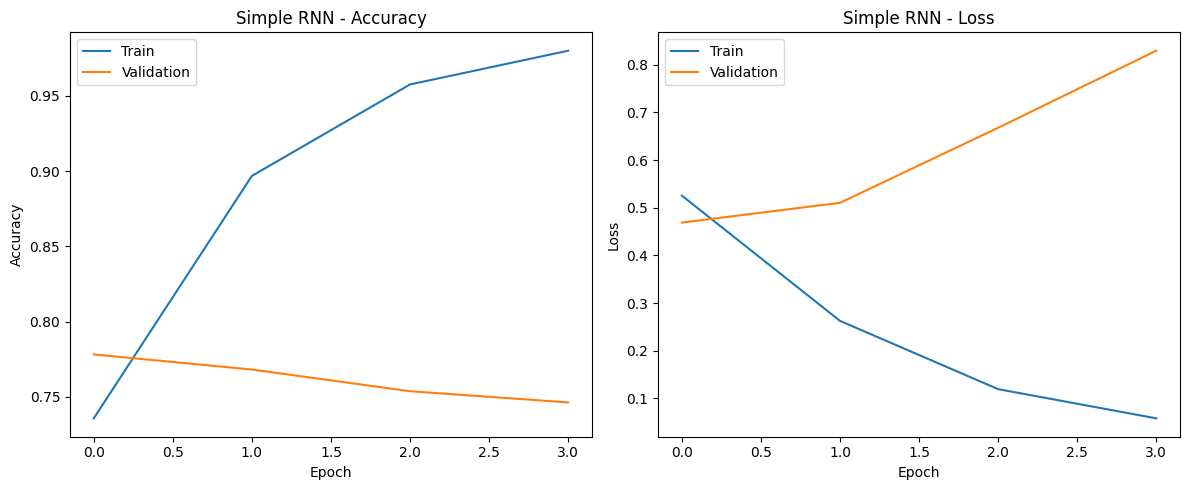

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history1.history['accuracy'])
plt.plot(history1.history['val_accuracy'])
plt.title('Simple RNN - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history1.history['loss'])
plt.plot(history1.history['val_loss'])
plt.title(f'Simple RNN - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()

Evaluating Model 1: Simple RNN
179/179 ━━━━━━━━━━━━━━━━━━━━ 1s 6ms/step

Model 1: Simple RNN Accuracy: 0.7900


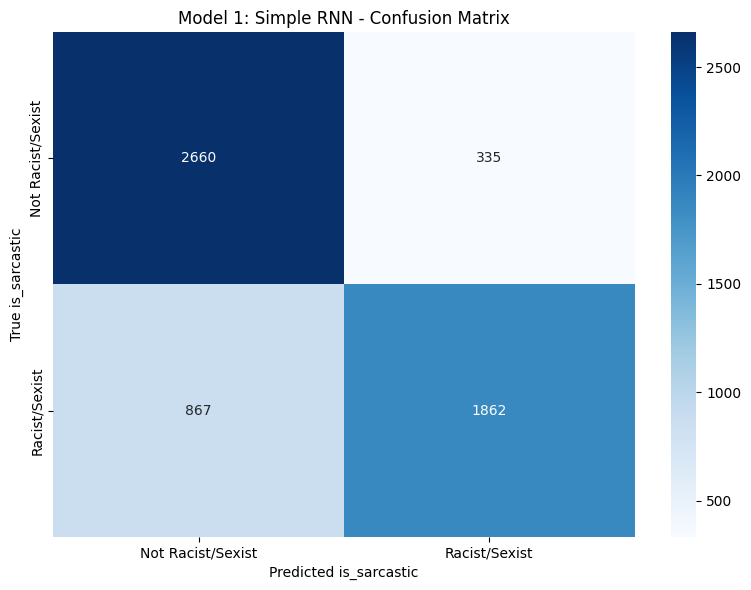


Model 1: Simple RNN Classification Report:
                   precision    recall  f1-score   support

Not Racist/Sexist       0.75      0.89      0.82      2995
    Racist/Sexist       0.85      0.68      0.76      2729

         accuracy                           0.79      5724
        macro avg       0.80      0.79      0.79      5724
     weighted avg       0.80      0.79      0.79      5724



In [ ]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
import seaborn as sns
# Define a function to evaluate the model
# It takes the trained model, test data, test labels, and model name as inputs
def evaluate_model(model, X_test, y_test, model_name):
    # Predict the probabilities of the test data
    # Each value will be between 0 and 1 (because we used sigmoid activation)
    y_pred_prob = model.predict(X_test)

    # Convert predicted probabilities to binary class labels (0 or 1)
    # If probability > 0.5 → class 1 (sarcastic), else → class 0 (not sarcastic)
    y_pred = (y_pred_prob > 0.5).astype(int)

    # Calculate the accuracy of the predictions
    accuracy = accuracy_score(y_test, y_pred)
    print(f"\n{model_name} Accuracy: {accuracy:.4f}")

        # Generate the confusion matrix
    cm = confusion_matrix(y_test, y_pred)

    # Create a heatmap to visualize the confusion matrix
    plt.figure(figsize=(8, 6))  # Set figure size
    sns.heatmap(
        cm,                       # Confusion matrix data
        annot=True,               # Show numbers inside the boxes
        fmt='d',                  # Integer formatting
        cmap='Blues',             # Color scheme
        xticklabels=['Not Racist/Sexist', 'Racist/Sexist'],  # Labels for predicted values
        yticklabels=['Not Racist/Sexist', 'Racist/Sexist']   # Labels for true values
    )
    plt.title(f'{model_name} - Confusion Matrix')  # Add title
    plt.ylabel('True is_sarcastic')                # Label for y-axis
    plt.xlabel('Predicted is_sarcastic')           # Label for x-axis
    plt.tight_layout()                             # Adjust layout
    plt.show()                                     # Show the heatmap


    # Classification Report
    print(f"\n{model_name} Classification Report:")
    print(classification_report(y_test, y_pred,
                               target_names=['Not Racist/Sexist', 'Racist/Sexist']))

    return accuracy, y_pred

# Evaluate each model
print("Evaluating Model 1: Simple RNN")
acc1, pred1 = evaluate_model(model, X_test_pad, y_test, "Model 1: Simple RNN")


## **3.2.2 Simple LSTM**

LSTM is a special type of RNN designed to remember long-term dependencies in sequences. Unlike simple RNNs, LSTMs use gates (forget, input, and output gates) to control the flow of information and to decide what to remember or forget over time. This allows LSTMs to overcome the vanishing gradient problem and perform better on tasks requiring long-range dependencies, such as language modeling, machine translation, and time-series forecasting.

In [ ]:
# Creating a new Sequential model using LSTM instead of SimpleRNN
simple_lstm = Sequential([
        # 1️⃣ Embedding Layer:
    # - Converts each word (represented as a number) into a dense vector of size 100
    # - Learns meaningful representations of words during training
    Embedding(input_dim=vocab_size,      # Total number of unique words (10,000)
              output_dim=embedding_dim), # Size of each word vector (100)


       # 2️⃣ LSTM Layer:
    # - Long Short-Term Memory (LSTM) is a type of RNN good at remembering long-term dependencies
    # - units=64: 64 memory units (neurons)
    # - dropout=0.2: Drop 20% of inputs randomly during training to prevent overfitting
    # - recurrent_dropout=0.2: Drop 20% of internal connections in the LSTM for regularization
    LSTM(units=64,
         dropout=0.2,
         recurrent_dropout=0.2),


    # 3️⃣ Dense Output Layer:
    # - Final layer with 1 neuron using sigmoid activation
    # - Outputs a value between 0 and 1 to classify as sarcastic or not
    Dense(1, activation='sigmoid')
])

# Defining the shape of input:
# - None means any batch size
# - max_length is the number of words per sentence (fixed at 25)
simple_lstm.build(input_shape=(None, max_length))


simple_lstm.summary()


Model: "sequential_1"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_1 (Embedding)         │ (None, 25, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm (LSTM)                     │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 1,042,305 (3.98 MB)

 Non-trainable params: 0 (0.00 B)

In [ ]:
simple_lstm.compile(
    loss='binary_crossentropy',  # The loss function used for binary classification (0 or 1)
    optimizer='adam',            # Optimizer to adjust weights efficiently during training
    metrics=['accuracy']         # Metric used to evaluate how well the model is doing
)


In [ ]:
# Training the LSTM model and saving the training history in 'history2'
history2 = simple_lstm.fit(
    X_train_pad,         # Padded training input data (same as used in RNN)
    y_train,             # Target labels (0 = not sarcastic, 1 = sarcastic)

    epochs=15,           # Maximum number of times the model will go through the full training data
    batch_size=64,       # Model processes 64 samples at a time during training (faster and more stable)

    validation_split=0.1,  # 10% of the training data will be used to validate the model after each epoch

    callbacks=[early_stopping],  # Stops training early if validation loss stops improving for 3 epochs

    class_weight = class_weights_dict,  # Handles class imbalance by giving more weight to less common class

    verbose=1            # Shows detailed training progress (loss, accuracy, etc.)
)


Epoch 1/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 24s 61ms/step - accuracy: 0.6158 - loss: 0.6345 - val_accuracy: 0.7834 - val_loss: 0.4576
Epoch 2/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 19s 55ms/step - accuracy: 0.8496 - loss: 0.3625 - val_accuracy: 0.7878 - val_loss: 0.4686
Epoch 3/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 18s 55ms/step - accuracy: 0.8915 - loss: 0.2794 - val_accuracy: 0.7921 - val_loss: 0.4803
Epoch 4/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 22s 59ms/step - accuracy: 0.9144 - loss: 0.2338 - val_accuracy: 0.7886 - val_loss: 0.5150


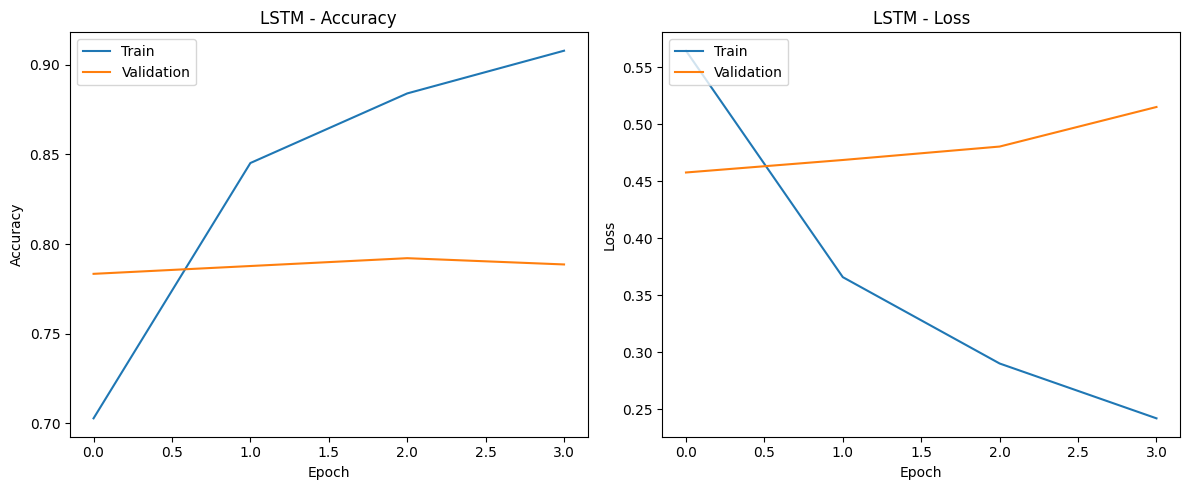

In [ ]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('LSTM - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title(f'LSTM - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


Evaluating Model 2: LSTM
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Model 2: LSTM Accuracy: 0.7911


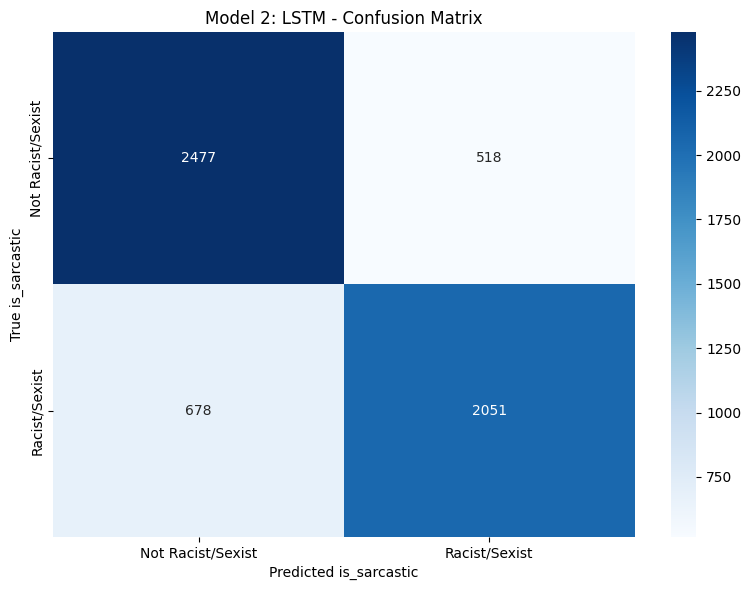


Model 2: LSTM Classification Report:
                   precision    recall  f1-score   support

Not Racist/Sexist       0.79      0.83      0.81      2995
    Racist/Sexist       0.80      0.75      0.77      2729

         accuracy                           0.79      5724
        macro avg       0.79      0.79      0.79      5724
     weighted avg       0.79      0.79      0.79      5724



In [ ]:
print("\nEvaluating Model 2: LSTM")
acc2, pred2 = evaluate_model(simple_lstm, X_test_pad, y_test, "Model 2: LSTM")

## **3.2.3 LSTM with the Word2Vec**
Word2Vec is a technique used to represent words as dense vectors (embeddings) in a continuous vector space. It captures the semantic meaning of words by placing similar words close together in the vector space. Word2Vec uses a neural network model to learn these word embeddings from large text corpora. There are two main approaches in Word2Vec:

CBOW (Continuous Bag of Words): Predicts a word based on its surrounding context.

Skip-Gram: Predicts the surrounding context words based on a given target word.

In [ ]:
import gensim.downloader as api
embedding_model = api.load('glove-wiki-gigaword-100')

[==================================================] 100.0% 128.1/128.1MB downloaded


In [ ]:
checkpoint_filepath = '/content/drive/MyDrive/AI and ML/Assessment/Assessment_2/rnn_best.h5'

# Creating a model checkpoint callback
# This automatically saves the best version of the model based on validation accuracy
model_checkpoint_callback = keras.callbacks.ModelCheckpoint(
    filepath=checkpoint_filepath,    # Where to save the model
    monitor='val_accuracy',          # Watch the validation accuracy during training
    mode='max',                      # Higher validation accuracy is better (maximize it)
    save_weights_only=False,         # Save the entire model, not just weights
    save_best_only=True              # Save only the best model (not after every epoch)
)

In [ ]:
import pickle  # Used to save Python objects like the tokenizer

# Create a new tokenizer that handles 10,000 most frequent words
# oov_token='<OOV>' handles unknown words (Out of Vocabulary)
tokenizer = Tokenizer(num_words=10000, oov_token='<OOV>')
tokenizer.fit_on_texts(X_train)  # Learn word index from training text

# Saving the tokenizer to a file for future use (like when deploying or testing)
with open("tokenizer.pkl", "wb") as f:
    pickle.dump(tokenizer, f)


vocab_size = 10000  # Total number of words we are using
embedding_dim = embedding_model.vector_size  # Dimension of each word vector (usually 100 or 300)

# Create an empty embedding matrix of shape (10000, embedding_dim)
# Each row will hold the vector for one word
embedding_matrix = np.zeros((vocab_size, embedding_dim))


# Loop through each word in the tokenizer's vocabulary
for word, i in tokenizer.word_index.items():
    if i >= vocab_size:
        continue  # Skip words beyond the top 10,000
    if word in embedding_model:
        embedding_vector = embedding_model[word]  # Get the pre-trained vector for this word
        embedding_matrix[i] = embedding_vector     # Place it in the embedding matrix


model_w2v = Sequential([
    # Embedding layer using the pre-trained Word2Vec matrix
    Embedding(
        input_dim=vocab_size,              # Number of words
        output_dim=embedding_dim,          # Size of each vector
        weights=[embedding_matrix],        # Use our custom embedding matrix
        input_length=max_length,           # Input sequence length (e.g., 25 words per sentence)
        trainable=False                    # We freeze the weights (no updating during training)
    ),

    # LSTM layer to learn the sequence patterns
    LSTM(64),

    # Output layer to classify (0 or 1) with sigmoid
    Dense(1, activation='sigmoid')
])


# Set the input shape for the model explicitly
model_w2v.build(input_shape=(None, max_length))

/usr/local/lib/python3.11/dist-packages/keras/src/layers/core/embedding.py:90: UserWarning: Argument `input_length` is deprecated. Just remove it.
  warnings.warn(


In [ ]:
embedding_dim

100

In [ ]:
model_w2v.compile(
    loss='binary_crossentropy',   # Used for binary classification tasks (0 or 1)
    optimizer='adam',             # Adam is an efficient optimizer that adjusts learning rates automatically
    metrics=['accuracy']          # Track accuracy during training and evaluation
)


In [ ]:
model_w2v.summary()

Model: "sequential_2"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ embedding_2 (Embedding)         │ (None, 25, 100)        │     1,000,000 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ lstm_1 (LSTM)                   │ (None, 64)             │        42,240 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 1)              │            65 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,042,305 (3.98 MB)

 Trainable params: 42,305 (165.25 KB)

 Non-trainable params: 1,000,000 (3.81 MB)

In [ ]:
X_train_pad.shape

(22895, 25)

In [ ]:
history_w2v = model_w2v.fit(   # Start training and store the training history in 'history_w2v'
    X_train_pad,               # Input: padded training sequences (converted text to numbers, all same length)
    y_train,                  # Output: target labels (0 for not sarcastic, 1 for sarcastic)

    epochs=15,                # Train the model for up to 15 full passes over the data
    batch_size=64,           # Process 64 samples at a time for each training step

    validation_split=0.1,    # Use 10% of the training data for validation to monitor model performance

    callbacks=[              # Use two callbacks:
        early_stopping,              # Stop training early if validation loss stops improving
        model_checkpoint_callback    # Save the best model based on highest validation accuracy
    ],

    class_weight=class_weights_dict,  # Apply class weights to handle imbalanced data

    verbose=1                # Print detailed logs for training progress (loss, accuracy, etc.)
)


Epoch 1/15
320/322 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step - accuracy: 0.6432 - loss: 0.6267

322/322 ━━━━━━━━━━━━━━━━━━━━ 12s 29ms/step - accuracy: 0.6435 - loss: 0.6263 - val_accuracy: 0.7485 - val_loss: 0.5174
Epoch 2/15
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 28ms/step - accuracy: 0.7538 - loss: 0.5046

322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 30ms/step - accuracy: 0.7538 - loss: 0.5045 - val_accuracy: 0.7830 - val_loss: 0.4742
Epoch 3/15
321/322 ━━━━━━━━━━━━━━━━━━━━ 0s 30ms/step - accuracy: 0.7928 - loss: 0.4481

322/322 ━━━━━━━━━━━━━━━━━━━━ 11s 32ms/step - accuracy: 0.7928 - loss: 0.4481 - val_accuracy: 0.7934 - val_loss: 0.4509
Epoch 4/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 18s 25ms/step - accuracy: 0.8121 - loss: 0.4042 - val_accuracy: 0.7817 - val_loss: 0.4538
Epoch 5/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 0s 46ms/step - accuracy: 0.8224 - loss: 0.3872

322/322 ━━━━━━━━━━━━━━━━━━━━ 16s 49ms/step - accuracy: 0.8224 - loss: 0.3872 - val_accuracy: 0.8026 - val_loss: 0.4462
Epoch 6/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 20s 47ms/step - accuracy: 0.8438 - loss: 0.3511 - val_accuracy: 0.7996 - val_loss: 0.4635
Epoch 7/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 23s 55ms/step - accuracy: 0.8551 - loss: 0.3271 - val_accuracy: 0.7996 - val_loss: 0.4446
Epoch 8/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 21s 56ms/step - accuracy: 0.8692 - loss: 0.3046 - val_accuracy: 0.7974 - val_loss: 0.4654
Epoch 9/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 31ms/step - accuracy: 0.8901 - loss: 0.2733 - val_accuracy: 0.7983 - val_loss: 0.4568
Epoch 10/15
322/322 ━━━━━━━━━━━━━━━━━━━━ 10s 30ms/step - accuracy: 0.8949 - loss: 0.2573 - val_accuracy: 0.7904 - val_loss: 0.5001


In [ ]:
# load the best model or model saved with the best weights

best_model = keras.models.load_model(checkpoint_filepath)

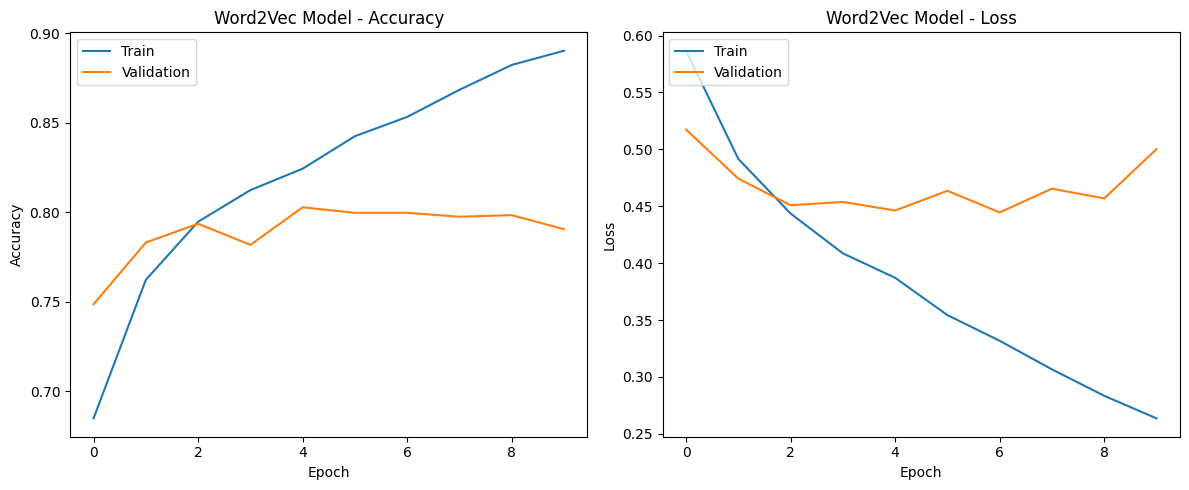

In [ ]:
# Visualize the results
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(history_w2v.history['accuracy'])
plt.plot(history_w2v.history['val_accuracy'])
plt.title('Word2Vec Model - Accuracy')
plt.ylabel('Accuracy')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')

plt.subplot(1, 2, 2)
plt.plot(history_w2v.history['loss'])
plt.plot(history_w2v.history['val_loss'])
plt.title('Word2Vec Model - Loss')
plt.ylabel('Loss')
plt.xlabel('Epoch')
plt.legend(['Train', 'Validation'], loc='upper left')
plt.tight_layout()
plt.show()


Evaluating Model with Word2Vec embeddings:
179/179 ━━━━━━━━━━━━━━━━━━━━ 2s 9ms/step

Word2Vec Model Accuracy: 0.7942


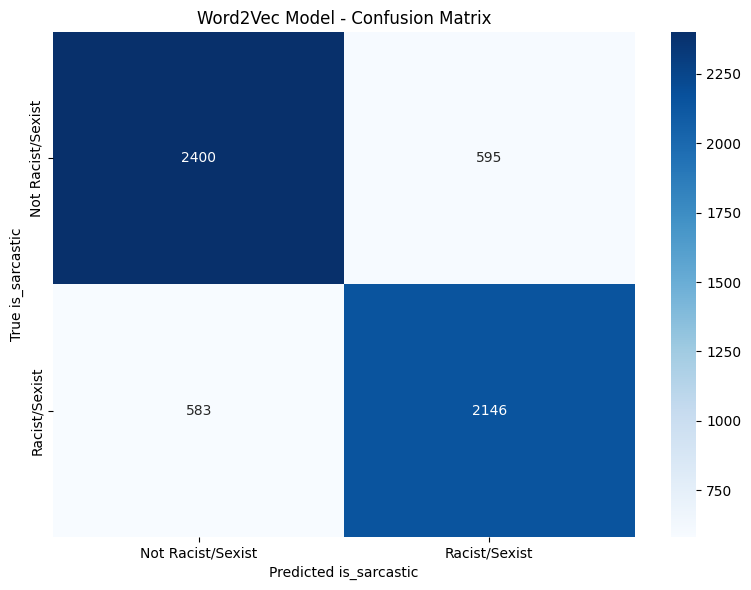


Word2Vec Model Classification Report:
                   precision    recall  f1-score   support

Not Racist/Sexist       0.80      0.80      0.80      2995
    Racist/Sexist       0.78      0.79      0.78      2729

         accuracy                           0.79      5724
        macro avg       0.79      0.79      0.79      5724
     weighted avg       0.79      0.79      0.79      5724



(0.794199860237596,
 array([[0],
        [1],
        [1],
        ...,
        [0],
        [0],
        [1]]))

In [ ]:
# Evaluate the Word2Vec model
print("\nEvaluating Model with Word2Vec embeddings:")
evaluate_model(best_model, X_test_pad, y_test, "Word2Vec Model")

In [ ]:
!pip install gradio

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 54.1/54.1 MB 16.0 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 322.9/322.9 kB 21.6 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 95.2/95.2 kB 7.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 11.5/11.5 MB 96.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 72.0/72.0 kB 5.4 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 62.5/62.5 kB 4.9 MB/s eta 0:00:00


In [ ]:
import gradio as gr
import pickle

# Load the tokenizer
with open("tokenizer.pkl", "rb") as f:
    tokenizer = pickle.load(f)

# Assuming 'best_model' is your loaded Word2Vec model (from previous code)
# and 'max_len' is the maximum sequence length used during training

def predict_sarcasm(headline):
    headline_clean = preprocess_text(headline)  # Assuming 'preprocess_text' is your cleaning function
    headline_seq = tokenizer.texts_to_sequences([headline_clean])
    headline_pad = pad_sequences(headline_seq, padding='post', maxlen=25)  # Use max_len from your training
    prediction = best_model.predict(headline_pad)[0][0]
    return "Sarcastic" if prediction >= 0.5 else "Not Sarcastic"  # Adjust threshold if needed

# Create the Gradio Interface
interface = gr.Interface(
    fn=predict_sarcasm,
    inputs=gr.Textbox(lines=2, placeholder="Enter a headline..."),
    outputs="text",
    title="Sarcasm Detection",
    description="Enter a headline to detect if it's sarcastic or not."
)

# Launch in Colab
interface.launch(share=True)

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://3ba409e0d3dad00e27.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
